TASK-1

In [ ]:
!unzip /content/CANData.zip

Archive:  /content/CANData.zip
replace __MACOSX/._CANData? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
#import regex as re
import numpy as np
import csv
def getData(filename):
  canData=[] #List to store teh can data
  f = open(filename)
  #read_file = reader(f)
  read_file =f.readlines()

  #file = list(read_file)
  speed = []
  rpm = []
  i = 0
  for row in read_file:
    #Change the positions of the values if needed
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33],
'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}

    if record["PID"] == '254': #Processing of speed
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      speed.append(record['value'])
     # print("i == ",i, "speed= ", record['value'])

    if record["PID"] == '115': #Processing of RPM
      if record["value"] >= 65535:
        record["attack"] = 1
      record['value'] =  (record['value'] * 2)
      rpm.append(record['value'])
     # print("i == ",i, "RPM= ", record['value'])
    i = i+1
    canData.append(record)
    record={}

  f.close()

  #Change the return value to speed or RPM if you want to return the other lists
  return canData,rpm,speed

TASK-2

Text(0.5, 1.0, 'Change of speed over time')

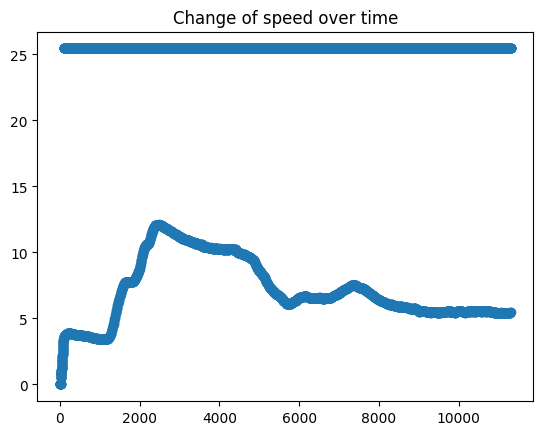

In [ ]:
df1,rpm1,speed1 = getData("/content/CANData/CAN Bus log - injection of FFF as the speed reading.log")
import matplotlib.pyplot as plt
fig= plt.figure()
time1=list(range(0,len(speed1)))
plt.scatter(time1,speed1)
plt.title('Change of speed over time')

Text(0.5, 1.0, 'Change of rpm over time')

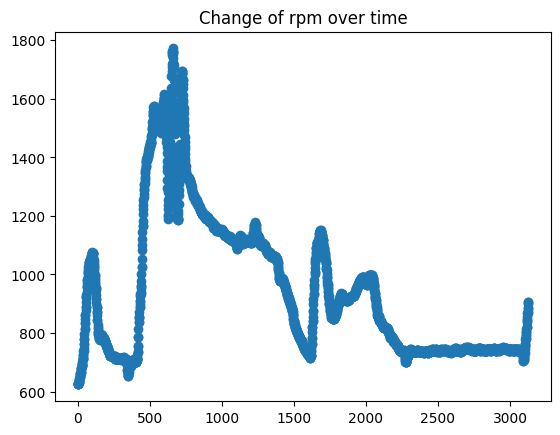

In [ ]:

time11=list(range(0,len(rpm1)))
plt.scatter(time11,rpm1)
plt.title('Change of rpm over time')

Text(0.5, 1.0, 'relation b/w speed and rpm')

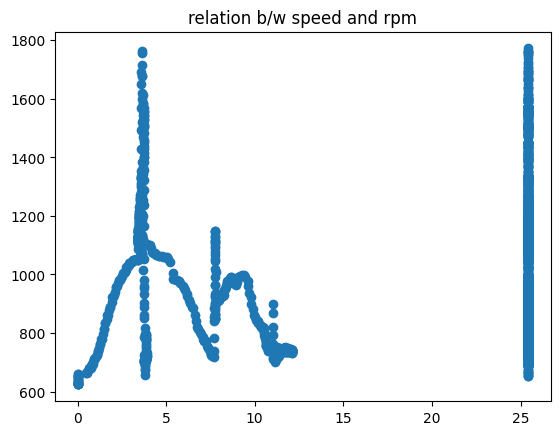

In [ ]:
plt.scatter(speed1[0:min(len(speed1),len(rpm1))],rpm1[0:min(len(speed1),len(rpm1))])

plt.title('relation b/w speed and rpm')

Text(0.5, 1.0, 'frequency for rpm')

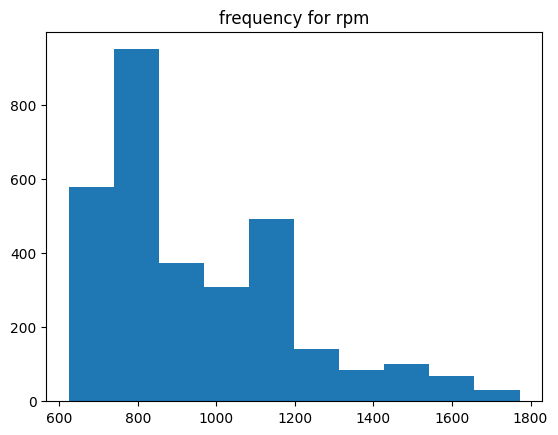

In [ ]:
plt.hist(rpm1)
plt.title('frequency for rpm')

Text(0.5, 1.0, 'frequency for speed')

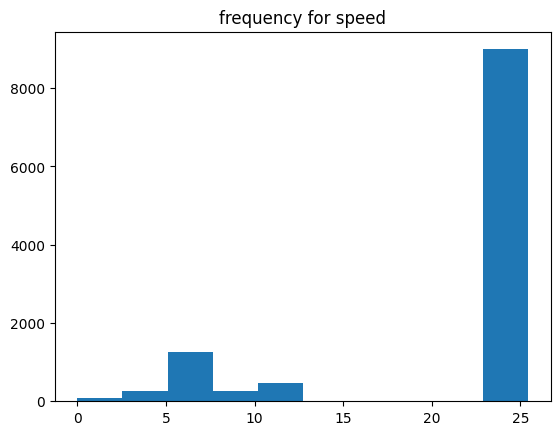

In [ ]:
plt.hist(speed1)
plt.title('frequency for speed')

In [ ]:
#incase of injection of FFF as speed
#we notice that speed doesn't increase gradually rather the opposite and speed fluctuates a lot which doesn't happen in normal cconditions
#rpm is unchanged but we find no relation b/w rpm and speed in this case
#in frequecny vs speed histogram we find that frequency of high speed is more which implies injection of speed
#and frequcney of rpm is quite normal.

-0.013449255905145514 0.4520205722499405


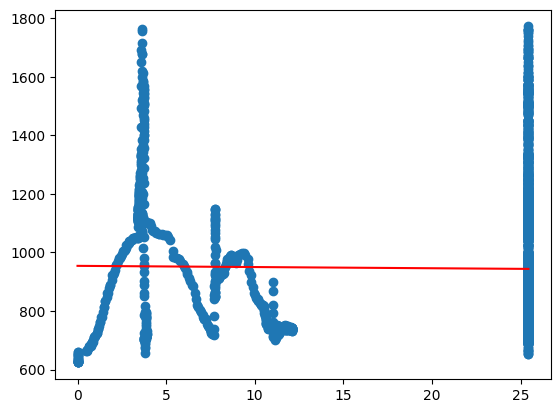

In [ ]:
from scipy.stats import pearsonr
corel1,p1= pearsonr(speed1[0:min(len(speed1),len(rpm1))],rpm1[0:min(len(speed1),len(rpm1))])
print(corel1,p1)
plt.scatter(speed1[0:min(len(speed1),len(rpm1))],rpm1[0:min(len(speed1),len(rpm1))])
plt.plot(np.unique(speed1),
         np.poly1d(np.polyfit(speed1[0:min(len(speed1),len(rpm1))],rpm1[0:min(len(speed1),len(rpm1))], 1))
         (np.unique(speed1)), color='red')

In [ ]:
#corelation value is -0.013 and p value is quite high implies that there is no strong corelation b/w speed and rpm.

Text(0.5, 1.0, 'Change of speed over time')

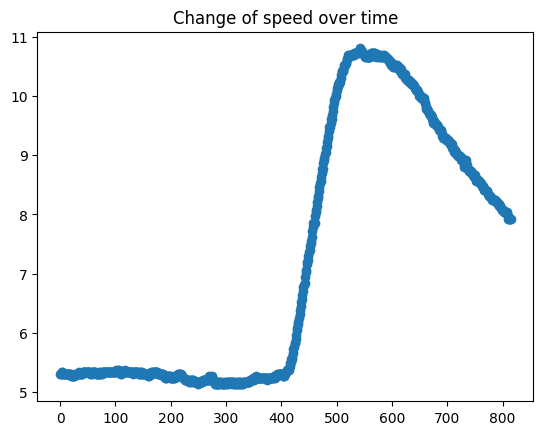

In [ ]:
df2,rpm2,speed2 = getData("/content/CANData/CAN Bus log - injection of RPM readings.log")
time2=list(range(0,len(speed2)))
plt.scatter(time2,speed2)
time21=list(range(0,len(rpm2)))
plt.title('Change of speed over time')

Text(0.5, 1.0, 'Change of rpm over time')

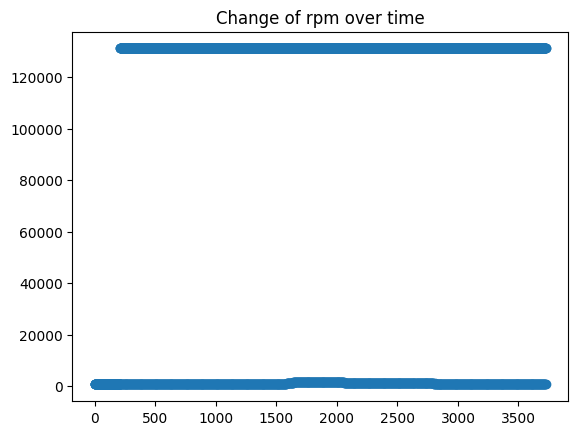

In [ ]:
plt.scatter(time21,rpm2)
plt.title('Change of rpm over time')

Text(0.5, 1.0, 'relation b/w speed and rpm')

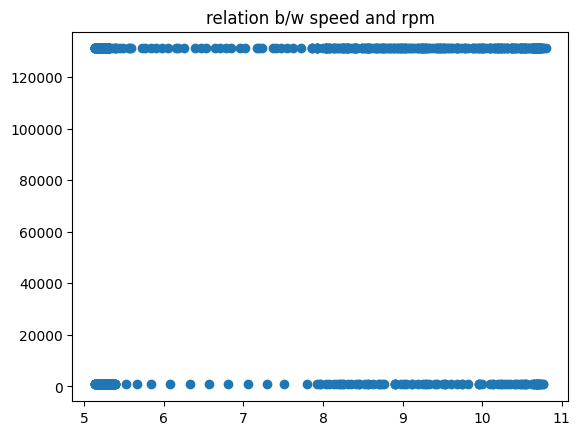

In [ ]:
plt.scatter(speed2,rpm2[0:min(len(speed2),len(rpm2))])
plt.title('relation b/w speed and rpm')


Text(0.5, 1.0, 'frequency for rpm')

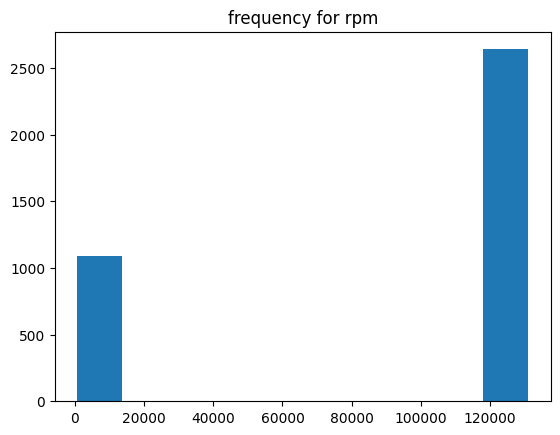

In [ ]:
plt.hist(rpm2)
plt.title('frequency for rpm')


Text(0.5, 1.0, 'frequency for speed')

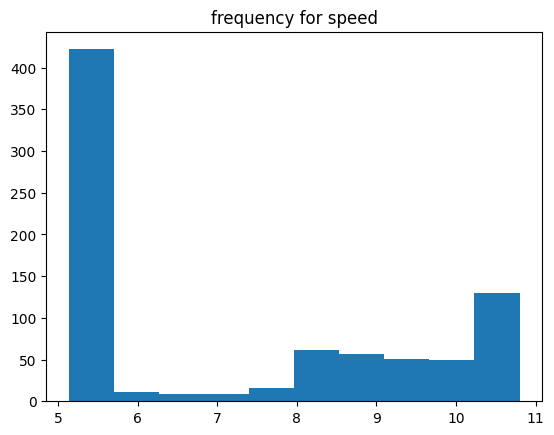

In [ ]:
plt.hist(speed2)
plt.title('frequency for speed')

In [ ]:
#incase of injection of  rpm
#we notice that rpm doesn't increase gradually rather the opposite and rpm fluctuates a lot which doesn't happen in normal cconditions
#speed behaves nprmally but we find no relation b/w rpm and speed in this case
#in frequecny vs rpm histogram we find that frequency of high rpm is more which implies injection of rpm
#and frequcney of speed is quite normal.

0.3342911708948233 9.374616040223142e-23


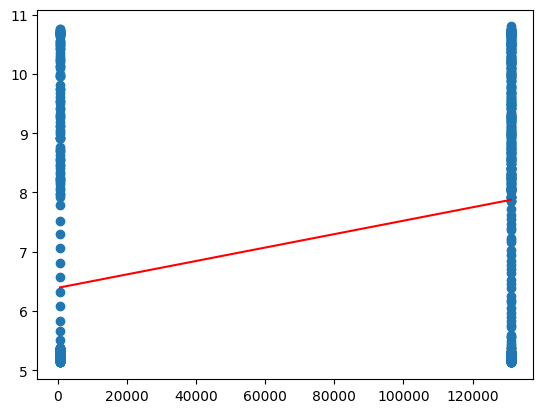

In [ ]:
corel2,p2= pearsonr(speed2[0:min(len(speed2),len(rpm2))],rpm2[0:min(len(speed2),len(rpm2))])
print(corel2,p2)
plt.scatter(rpm2[0:min(len(rpm2),len(speed2))],speed2[0:min(len(rpm2),len(speed2))])
plt.plot(np.unique(rpm2),
         np.poly1d(np.polyfit(rpm2[0:min(len(speed2),len(rpm2))],speed2[0:min(len(speed2),len(rpm2))], 1))
         (np.unique(rpm2)), color='red')

In [ ]:
#corelation value is 0.33 and p value 9.37*10^-23 implies that there is weak corelation b/w speed and rpm.

Text(0.5, 1.0, 'Change of speed over time')

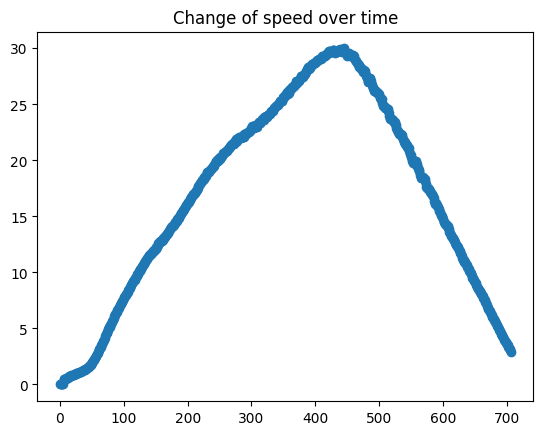

In [ ]:
df3,rpm3,speed3 = getData("/content/CANData/CAN bus log - no injection of messages.log")
fig= plt.figure();
time3=list(range(0,len(speed3)))
plt.scatter(time3,speed3)
plt.title('Change of speed over time')


Text(0.5, 1.0, 'Change of rpm over time')

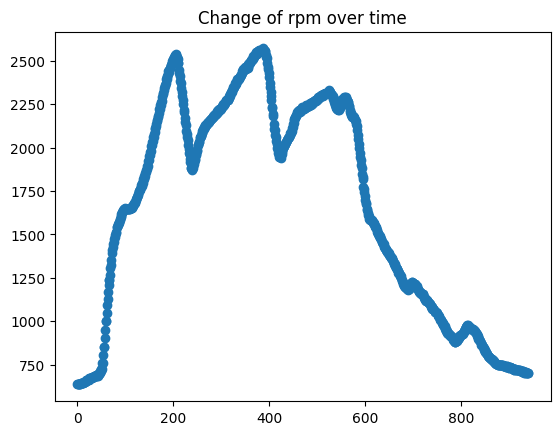

In [ ]:
time31=list(range(0,len(rpm3)))
plt.scatter(time31,rpm3)
plt.title('Change of rpm over time')


Text(0.5, 1.0, 'relation b/w speed and rpm')

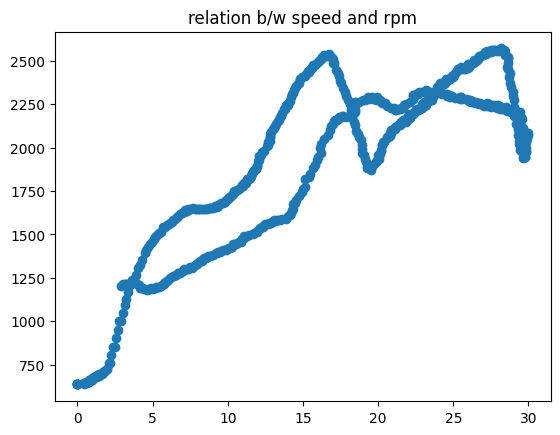

In [ ]:
plt.scatter(speed3,rpm3[0:min(len(speed3),len(rpm3))])
plt.title('relation b/w speed and rpm')


Text(0.5, 1.0, 'frequency for rpm')

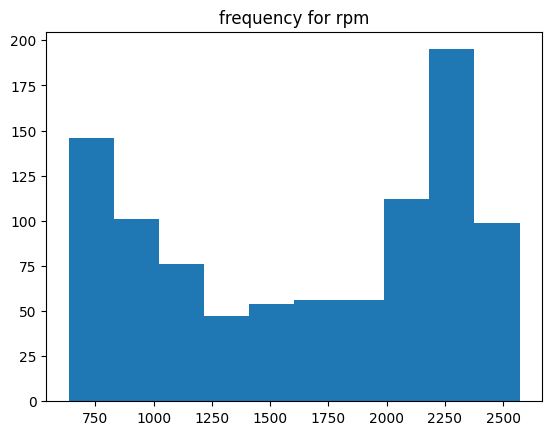

In [ ]:
plt.hist(rpm3)
plt.title('frequency for rpm')


Text(0.5, 1.0, 'frequency for speed')

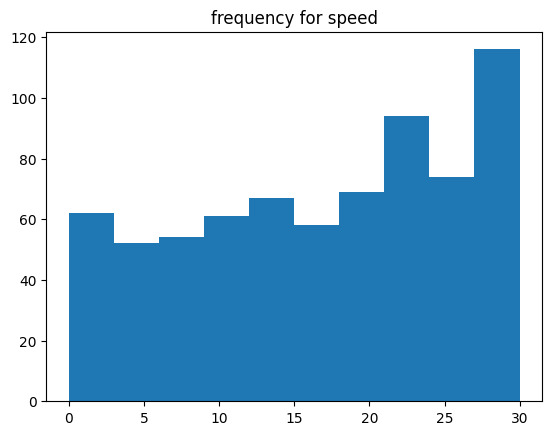

In [ ]:
plt.hist(speed3)
plt.title('frequency for speed')

In [ ]:
#incase of normal conditions
#speed increases gradually over time and speed also decreases speed gradually over time.
#change of rpm is quite normal
#speed and rpm in normal conditions are quite higly corelated
#we can see frequency of speeds which is quite normal and there is no abrupt change in speed and rpm.

0.8562263477630458 2.0856358142251474e-204


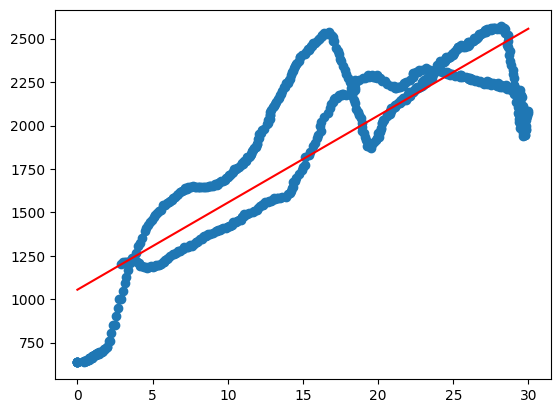

In [ ]:
from scipy.stats import pearsonr
corel3,p3= pearsonr(speed3[0:min(len(speed3),len(rpm3))],rpm3[0:min(len(speed3),len(rpm3))])
print(corel3,p3)
plt.scatter(speed3[0:min(len(speed3),len(rpm3))],rpm3[0:min(len(speed3),len(rpm3))])
plt.plot(np.unique(speed3),
         np.poly1d(np.polyfit(speed3[0:min(len(speed3),len(rpm3))],rpm3[0:min(len(speed3),len(rpm3))], 1))
         (np.unique(speed3)), color='red')

In [ ]:
#since the corelation is close to 1 means that they are highly corelated.

TASK-3

In [ ]:
df=df1+df2+df3
# combining three datasets

In [ ]:
df=pd.DataFrame(df)
df.head()
#converting  to data rame

,stamp,PID,const1,change,value,value2,attack
0,1522028465.309906,264,0003,848C0100,32118.0,0,0
1,1522028465.310141,342,0027,073F0E00,14789.0,0,0
2,1522028465.310396,344,A5A1,B1A8459C,16384.0,0,0
3,1522028465.310662,40A,C102,39393738,12544.0,0,0
4,1522028465.310916,262,0800,08003253,40394.0,0,0


In [ ]:
X=df.iloc[:,4:5].values
Y=df.iloc[:,6].values
#independent variable as X and dependent as Y

In [ ]:
Y.shape

(142763,)

In [ ]:
from sklearn.model_selection import train_test_split
#spliting 1/4rth dataset for testing and 3/4rth dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

In [ ]:
X_train.shape

(107072, 1)

In [ ]:


#predict values for new data
# cm_rf = confusion_matrix(y_test,RF_pred)
from sklearn.linear_model import LogisticRegression
LOG_model = LogisticRegression(random_state=50)
LOG_model.fit(X_train,y_train)

PRED_LR = LOG_model.predict(X_test)
from sklearn import metrics
r_square = metrics.r2_score(y_test, PRED_LR)
from sklearn.metrics import confusion_matrix
#confusion matrix associated with y_test and PRED_LR
cm_lr = confusion_matrix(y_test,PRED_LR)
print('R-Square Error of this method  is:', r_square)
from sklearn.metrics import accuracy_score
print('The accuracy score is:',accuracy_score(y_test,PRED_LR))

R-Square Error of this method  is: -0.0903675190175055
The accuracy score is: 0.9171219635202151


In [ ]:
# we obsserve that this method is not quite good or as expected beacuse of overfitting and it is also quite sensitive to outliers.
#when we calculate r-square error which comes out to be -0.090 implying very less accuracy.

TASK-4

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#using decision tree classification for supervised learning
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
dt_pred = DT_model.predict(X_test)
r_square = metrics.r2_score(y_test, dt_pred)
print('R-Square Error of Decision Tree Classification :', r_square)
#confusion matrix associated with t_test and rf_pred
cm_dt=confusion_matrix(y_test,dt_pred)
print('The accuracy score is:',accuracy_score(y_test,dt_pred))

R-Square Error of Decision Tree Classification : 0.9996313835297439
The accuracy score is: 0.9999719817320893


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_nb_pred = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, dt_pred)
print("Naive Bayes Accuracy:", accuracy_nb)
r_square = metrics.r2_score(y_test, dt_pred)
print('R-Square Error of Decision Tree Classification :', r_square)

Naive Bayes Accuracy: 0.9999719817320893
R-Square Error of Decision Tree Classification : 0.9996313835297439


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, dt_pred)
print("Random Forest Accuracy:", accuracy_rf)
r_square = metrics.r2_score(y_test, dt_pred)
print('R-Square Error of Decision Tree Classification :', r_square)

Random Forest Accuracy: 0.9999719817320893
R-Square Error of Decision Tree Classification : 0.9996313835297439


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
r_square = metrics.r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r_square )

In [ ]:
# we obsereve that error in decision tree is accetable. We used R- squared error to
#find out the error which came out to be 0.9996280633812262 in this methods we further calcuate confusion matrix to compare these two methods.

TASK-5

In [ ]:
#confusion matrix for both the methods are shown below:
print(cm_lr)
print(cm_dt)
#here we observe that logistic regression model falsely reports that attack has happened where
#as in reality no attack/injection of meaasges have been occured which were correctly identified by decision tree model
#false negitive rate for logistic regression is quite high and further inaccurate.
#false negivite rate for decision tree is very low and further very accrate.

[[32733     0]
 [ 2958     0]]
[[32733     0]
 [    1  2957]]


TASK-6

In [ ]:
#Here we used two ml calssification methods to detect whether an attack has happened or not. We can observe that
#results of decision tree are quite acceptable than results provided by logistic regression.While using logistic we
#observe that we have only limited data on vehicles that were attacked and so logistic regression failed.
#so incase we have have little data for prepration decision tree works effectively.
#We overcame that using decision tree which indeed provided correct reuslts most of time.
#We can improve accuracy increasing randomness  in dataset and take more data as in dataset.